In [1]:
# Colab Cell 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
# Colab Cell 2: Load MNIST
# Loads 60k training + 10k test images (28x28 grayscale) with integer labels (0‑9)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Reshape to [samples, height, width, channels] and normalize pixel values to [0,1]
train_images = train_images.astype("float32") / 255.0  # convert to floats and normalize:contentReference[oaicite:2]{index=2}
test_images  = test_images.astype("float32")  / 255.0

train_images = np.expand_dims(train_images, -1)  # shape: (60000, 28, 28, 1)
test_images  = np.expand_dims(test_images,  -1)  # shape: (10000, 28, 28, 1)

# Convert labels to one‑hot encoded vectors for training
num_classes = 10
train_labels_onehot = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_onehot  = tf.keras.utils.to_categorical(test_labels,  num_classes)

print(f"Training samples: {train_images.shape}")
print(f"Test samples: {test_images.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28, 1)
Test samples: (10000, 28, 28, 1)


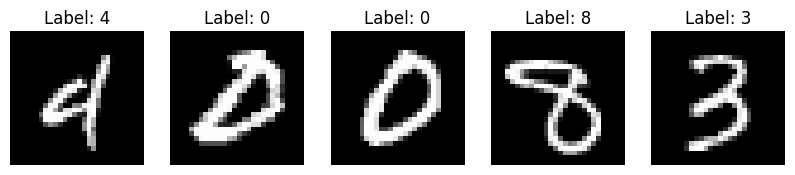

In [3]:
# Colab Cell 3: Show a few random images with their labels
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(train_images))
    ax.imshow(train_images[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {train_labels[idx]}")
    ax.axis("off")
plt.show()

In [4]:
# Colab Cell 4: Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                  input_shape=(28, 28, 1)),  # convolutional layer:contentReference[oaicite:4]{index=4}
    layers.MaxPooling2D((2, 2)),                          # max‑pool layer:contentReference[oaicite:5]{index=5}
    layers.Flatten(),
    layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),  # dense hidden layer:contentReference[oaicite:6]{index=6}
    layers.Dense(num_classes, activation='softmax')       # softmax output layer for 10 classes:contentReference[oaicite:7]{index=7}
])

# Compile the model with SGD optimizer and categorical cross‑entropy loss:contentReference[oaicite:8]{index=8}
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Colab Cell 5: Train the CNN
epochs = 10
batch_size = 64

history = model.fit(
    train_images, train_labels_onehot,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,   # use 10% of training data for validation
    verbose=2
)


Epoch 1/10
844/844 - 27s - 32ms/step - accuracy: 0.9316 - loss: 0.2243 - val_accuracy: 0.9752 - val_loss: 0.0864
Epoch 2/10
844/844 - 40s - 48ms/step - accuracy: 0.9763 - loss: 0.0807 - val_accuracy: 0.9795 - val_loss: 0.0679
Epoch 3/10
844/844 - 40s - 47ms/step - accuracy: 0.9845 - loss: 0.0528 - val_accuracy: 0.9810 - val_loss: 0.0677
Epoch 4/10
844/844 - 23s - 27ms/step - accuracy: 0.9894 - loss: 0.0376 - val_accuracy: 0.9828 - val_loss: 0.0642
Epoch 5/10
844/844 - 41s - 49ms/step - accuracy: 0.9923 - loss: 0.0281 - val_accuracy: 0.9828 - val_loss: 0.0630
Epoch 6/10
844/844 - 40s - 47ms/step - accuracy: 0.9944 - loss: 0.0211 - val_accuracy: 0.9823 - val_loss: 0.0611
Epoch 7/10
844/844 - 42s - 50ms/step - accuracy: 0.9963 - loss: 0.0158 - val_accuracy: 0.9832 - val_loss: 0.0603
Epoch 8/10
844/844 - 41s - 48ms/step - accuracy: 0.9976 - loss: 0.0117 - val_accuracy: 0.9842 - val_loss: 0.0590
Epoch 9/10
844/844 - 23s - 28ms/step - accuracy: 0.9986 - loss: 0.0089 - val_accuracy: 0.9852 - 

In [6]:
# Colab Cell 6: Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels_onehot, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.9855


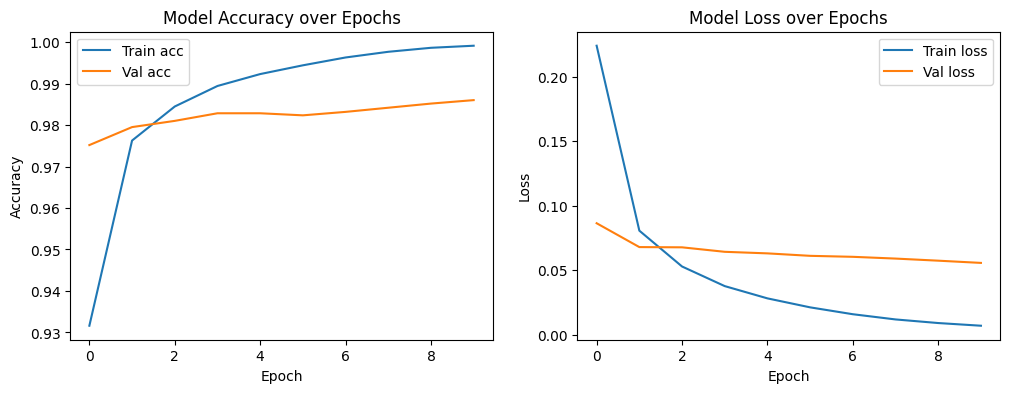

In [7]:
# Colab Cell 7: Plot learning curves
plt.figure(figsize=(12, 4))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


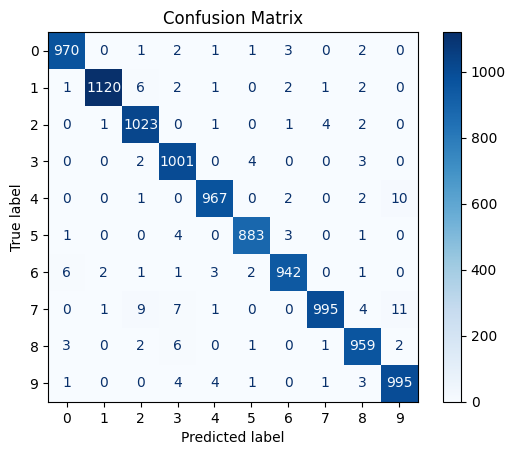

Number of misclassified samples: 145


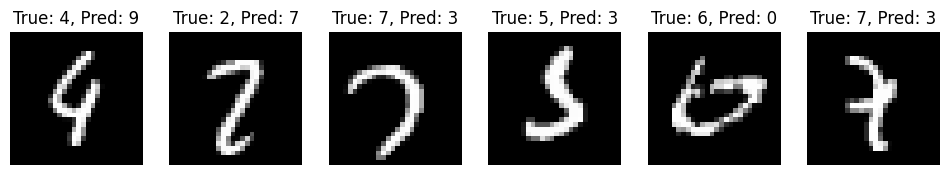

In [8]:
# Colab Cell 8: Compute confusion matrix
pred_labels = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display a few misclassified images
mis_idx = np.where(pred_labels != test_labels)[0]
print(f"Number of misclassified samples: {len(mis_idx)}")

num_to_show = 6
fig, axes = plt.subplots(1, num_to_show, figsize=(12, 2))
for i, ax in enumerate(axes.flat):
    idx = mis_idx[i]
    ax.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {test_labels[idx]}, Pred: {pred_labels[idx]}")
    ax.axis("off")
plt.show()


In [9]:
# Colab Cell 9: Save the model (optional)
model.save('mnist_cnn.h5')

# To reload later
# loaded_model = tf.keras.models.load_model('mnist_cnn.h5')
# loaded_model.predict(test_images[:5])
